# Creating Simple Log Plots of Well Log Data

## introduction
Well log plots are a common visualization tool within geoscience and petrophysics. they allow easy visualization of data (for example, Gamma Ray, Neutron Porosity, bulk Density, etc.) that has been acquired along the length (depth) of a wellbore. On these plots we display our logging measurements on the x-axis and measure depth or true vertical depth on the y-axis.

## Importing Modules and Loading Data LAS files



In [1]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt

In [2]:
las = lasio.read('../Data/inputs/15-9-19_SR_COMP.LAS')

In [3]:
# converting it to Pandas Dataframe
df = las.df()

In [4]:
#describing statistics of data
df.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400


In [5]:
# getting data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29754 entries, 102.1568 to 4636.514
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      7007 non-null   float64
 1   CALI    7007 non-null   float64
 2   DEN     7084 non-null   float64
 3   GR      28117 non-null  float64
 4   NEU     7096 non-null   float64
 5   RDEP    12223 non-null  float64
 6   RMED    12223 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [6]:
# viewing first 10 lines of the file
df.head(10)

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
102.9188,NaN,NaN,NaN,15.6696,NaN,NaN,NaN
103.0712,NaN,NaN,NaN,17.9443,NaN,NaN,NaN
103.2236,NaN,NaN,NaN,18.0740,NaN,NaN,NaN
103.3760,NaN,NaN,NaN,18.2037,NaN,NaN,NaN


Here, We can see that there are lots of columns present in our data, each column represents that have been takken when the logging tools were moved along the well.

The columns represents the following:

- AC for Acoustic Comprressional Slowness
- CALI for borehole caliper
- DEN for Bulk Density
- GR for Gamma Ray
- NEU for neutron porosity
- RDEP for Deep resistivity
- RMED for medium resistivity

To make it easier to work with our dataframe, we can convert the dataframe index, which is set to depth, to a column within the dataframe. We can do this by reseting the index as following:

In [7]:
df.reset_index(inplace=True)

Here **inplace=True** allows us to make the changes to the original dataframe object.

In [8]:
df.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


Renaming for DEPT column to DEPTH

In [9]:
df.rename(columns={'DEPT' : 'DEPTH'}, inplace=True)

In [10]:
df.head()

,DEPTH,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


## Creating Simple Line Plot

We can easily create a simple plot by caling upon df.plot() and passing in two columns

<AxesSubplot:xlabel='GR'>

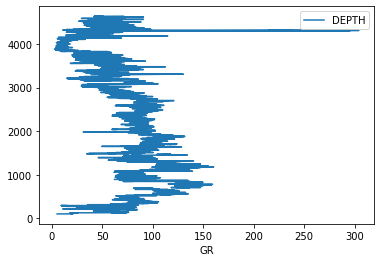

In [11]:
df.plot(x='GR', y='DEPTH')
# its very simple plot and doesnt give any more details.

## Quick Subplot
If we want ot see al columns within the dataframe, we can generate subplot grid.

This is done by taking the same line as beofre and we pass in **subplots=True**. We can also add figure size **figsize()**, which controls how large the plot will appear.


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

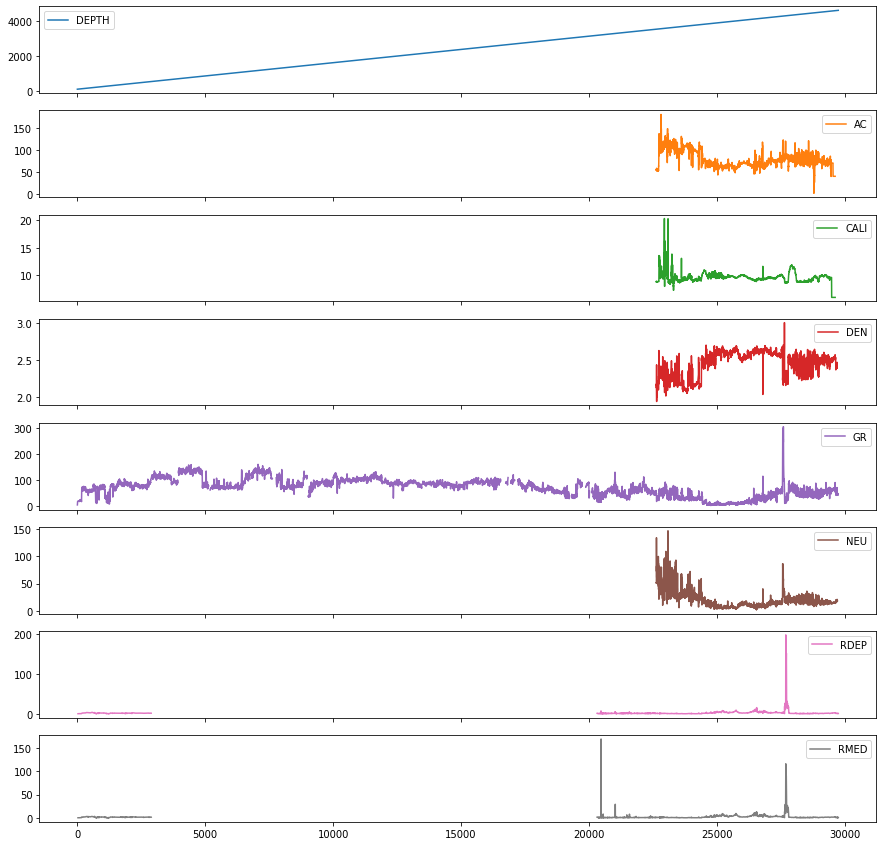

In [12]:
df.plot(subplots=True, figsize=(15,15))

and now we see a grid of plots, one for each of columns within dataframe. This is a useful way to check where we have data and where we may have gaps.

We donot have much control over this plot, but lets work with subplots in matplotlib now.

## Working with Subplots in MAtplotlib

Ther are many ways to generate subplots using Matplotlib. Here we will work with **subplot2grid**.

- Define a figure and call upon **plt.subplots**. Figure size can be set
- Create axis on figure object. We can do this by assigning **ax1 = plt.subplot2grid()**.
- Next pass in shape of subplot grid. 
- Specify Locatio using index positions

Rowspan and Colspan are both set to 1, which means there will be 1 column wide by 1 row high.
- NExt, tell matplotlib what we want in subplot.
We can set x and y limits and displaying the grid.


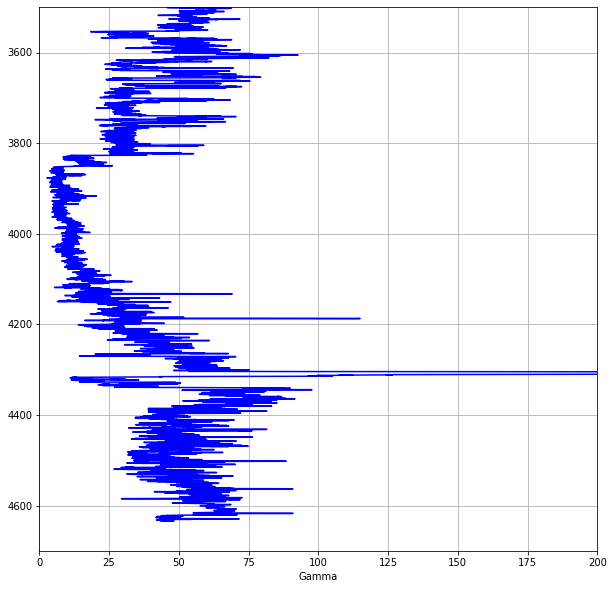

In [13]:
fig = plt.subplots(figsize=(10,10))

# set up plot axis
ax1= plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
# call the data from the df dataframe
ax1.plot('GR','DEPTH',data=df,color='blue')
# Assign Track title
ax1.set_xlabel("Gamma")
#change the limits for the curve being plotted on x axis
ax1.set_xlim(0,200)
# Set depth range for y axis
ax1.set_ylim(4700,3500)
#display grid
ax1.grid() 

Its looking great, noe

## Adding Resistivity Log
To add a new track or subplot to our figure, we can repeat the process and add a new axis, ax2. 
We increment the second digit in the layout of **plt.subplot2grid()** so it is now 1 row, by 2 columns. for ax2, we need to place it in the second column and this is done by changing the location argument from **(0,0)**, to **(0,1)**

Also, as resistivity is normally scale logarithmically, we need to add in the line **ax2.semilogx()**.

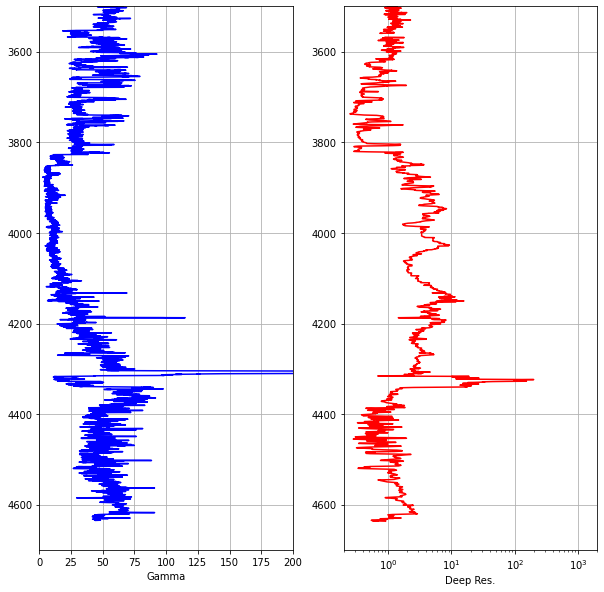

In [14]:
fig = plt.subplots(figsize=(10,10))

# set up plot axis

ax1= plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
ax2= plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1)

# call the data from the df dataframe
ax1.plot('GR','DEPTH',data=df,color='blue')
# Assign Track title
ax1.set_xlabel("Gamma")
#change the limits for the curve being plotted on x axis
ax1.set_xlim(0,200)
# Set depth range for y axis
ax1.set_ylim(4700,3500)
#display grid
ax1.grid() 

# call the data from the df dataframe
ax2.plot('RDEP','DEPTH',data=df,color='red')
# Assign Track title
ax2.set_xlabel("Deep Res.")
#change the limits for the curve being plotted on x axis
ax2.set_xlim(0.2,2000)
# adding a logarithmic scale to resistivity
ax2.semilogx()
# Set depth range for y axis
ax2.set_ylim(4700,3500)


#display grid
ax2.grid() 

## Adding the Densit Log

To Add another subplot we can repeat the process;

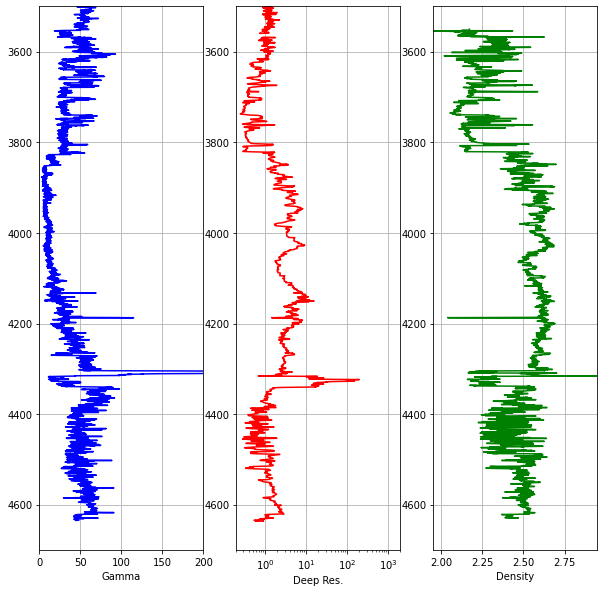

In [15]:
fig = plt.subplots(figsize=(10,10))

# set up plot axis

ax1= plt.subplot2grid((1,3), (0,0), rowspan=1, colspan=1)
ax2= plt.subplot2grid((1,3), (0,1), rowspan=1, colspan=1)

ax3= plt.subplot2grid((1,3), (0,2), rowspan=1, colspan=1)

# call the data from the df dataframe
ax1.plot('GR','DEPTH',data=df,color='blue')
# Assign Track title
ax1.set_xlabel("Gamma")
#change the limits for the curve being plotted on x axis
ax1.set_xlim(0,200)
# Set depth range for y axis
ax1.set_ylim(4700,3500)
#display grid
ax1.grid() 

# call the data from the df dataframe
ax2.plot('RDEP','DEPTH',data=df,color='red')
# Assign Track title
ax2.set_xlabel("Deep Res.")
#change the limits for the curve being plotted on x axis
ax2.set_xlim(0.2,2000)
# adding a logarithmic scale to resistivity
ax2.semilogx()
# Set depth range for y axis
ax2.set_ylim(4700,3500)
#display grid
ax2.grid()


# call the data from the df dataframe
ax3.plot('DEN','DEPTH',data=df,color='green')
# Assign Track title
ax3.set_xlabel("Density")
#change the limits for the curve being plotted on x axis
ax3.set_xlim(1.95,2.95)
# Set depth range for y axis
ax3.set_ylim(4700,3500)
#display grid
ax3.grid() 
 

## Tidying UP Common Elements
We can see from te previous call that we have a number of elements that are repeated in each of the axis calls, such as **ax.set_ylim(4700,3500)**. We can seperate these out so that we only need to call these functions once.

This is acheived by using a for loop and enumerating over **fig.axes**

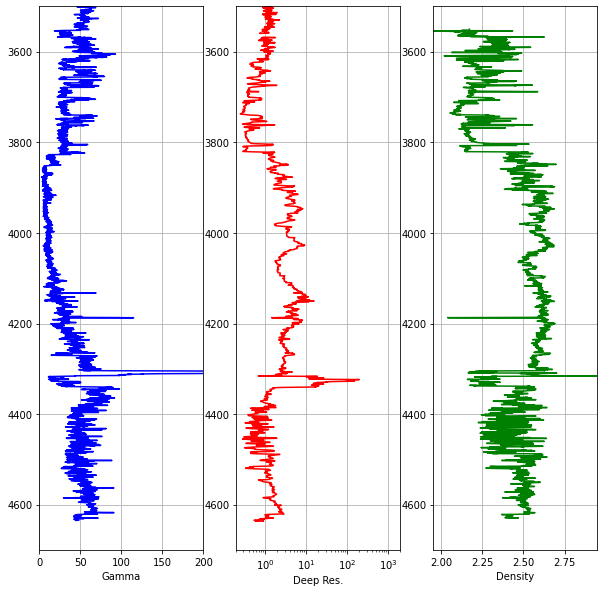

In [16]:

fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Deep Res.', 'Density']

# set up plot axis

ax1= plt.subplot2grid((1,3), (0,0), rowspan=1, colspan=1)
ax2= plt.subplot2grid((1,3), (0,1), rowspan=1, colspan=1)
ax3= plt.subplot2grid((1,3), (0,2), rowspan=1, colspan=1)

# call the data from the df dataframe
ax1.plot('GR','DEPTH',data=df,color='blue')
ax1.set_xlim(0,200)


# call the data from the df dataframe
ax2.plot('RDEP','DEPTH',data=df,color='red')
ax2.set_xlim(0.2,2000)
ax2.semilogx()



# call the data from the df dataframe
ax3.plot('DEN','DEPTH',data=df,color='green')
ax3.set_xlim(1.95,2.95)

for i, ax in enumerate(fig.axes):
    ax.set_ylim(4700,3500) # set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])
 

to clean up further, we can remove depth labels in between each subplot / track and reduce the space between them.

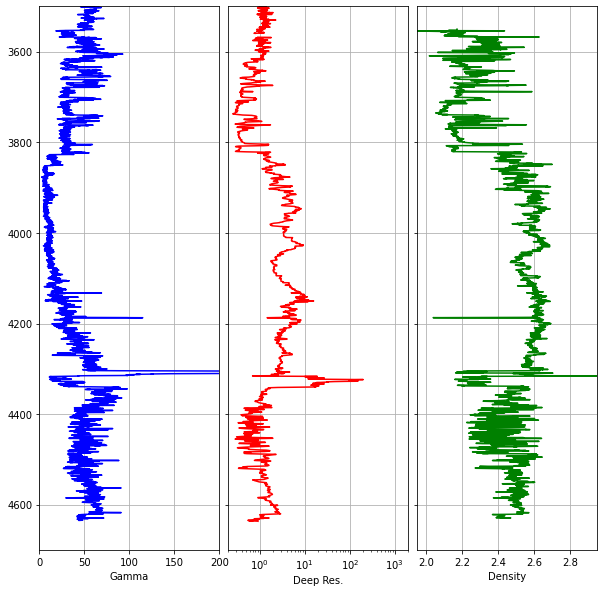

In [17]:
fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Deep Res.', 'Density']

# set up plot axis

ax1= plt.subplot2grid((1,3), (0,0), rowspan=1, colspan=1)
ax2= plt.subplot2grid((1,3), (0,1), rowspan=1, colspan=1)
ax3= plt.subplot2grid((1,3), (0,2), rowspan=1, colspan=1)

# call the data from the df dataframe
ax1.plot('GR','DEPTH',data=df,color='blue')
ax1.set_xlim(0,200)


# call the data from the df dataframe
ax2.plot('RDEP','DEPTH',data=df,color='red')
ax2.set_xlim(0.2,2000)
ax2.semilogx()



# call the data from the df dataframe
ax3.plot('DEN','DEPTH',data=df,color='green')
ax3.set_xlim(1.95,2.95)

# set up common elements between subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4700,3500) # set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])


# Hide tick labels between subplots
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
# reduce the space between each subplot
fig.subplots_adjust(wspace=0.05)

## Adding another subplot

We can add Neutron Porosity Log in our plots, as combined with Bulk density allow us to identify lithology variations as well as fluid identification. Let plot them both on the same subplot.

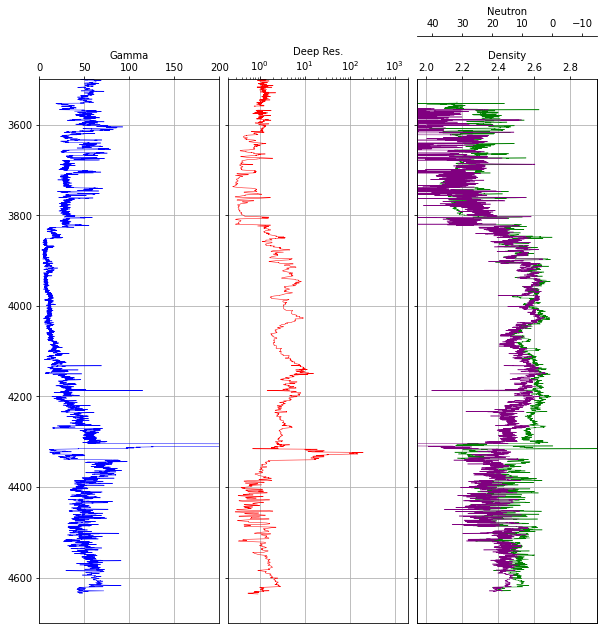

In [18]:
fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Deep Res.', 'Density','Neutron']

# set up plot axis

ax1= plt.subplot2grid((1,3), (0,0), rowspan=1, colspan=1)
ax2= plt.subplot2grid((1,3), (0,1), rowspan=1, colspan=1)
ax3= plt.subplot2grid((1,3), (0,2), rowspan=1, colspan=1)
ax4 = ax3.twiny()

# call the data from the df dataframe
ax1.plot('GR','DEPTH',data=df,color='blue', lw=0.5)
ax1.set_xlim(0,200)


# call the data from the df dataframe
ax2.plot('RDEP','DEPTH',data=df,color='red', lw=0.5)
ax2.set_xlim(0.2,2000)
ax2.semilogx()



# call the data from the df dataframe
ax3.plot('DEN','DEPTH',data=df,color='green', lw=0.5)
ax3.set_xlim(1.95,2.95)

# call the data from the df dataframe
ax4.plot('NEU','DEPTH',data=df,color='purple', lw=0.5)
ax4.set_xlim(45,-15)

# set up common elements between subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4700,3500) # set the depth range
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])
    
    if i == 3:
        ax.spines['top'].set_position(('axes', 1.08))
    else:
        ax.grid()


# Hide tick labels between subplots
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
# reduce the space between each subplot
fig.subplots_adjust(wspace=0.05)

## Summary
We have seen how to create log plots to explore and visualize the well log data files (LAS) that can be used in publications.

Author : Dilshad Raza\
Date Created: 07/16/2022